In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

import tigramite
from tigramite import data_processing as dp #pp
from tigramite import plotting as tp
from tigramite.lpcmci import LPCMCI
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import CMIknn #, GPDC, ParCorr, CMIsymb
import time
#import dcor
#import sklearn
import pickle

import os

from matplotlib.pyplot import figure
figure(figsize=(20,15), dpi=80)

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

In [11]:
cd ~/Documents/MATLAB/MMM_Analysis/figures/LPCMCI/Ginsburg/

/Users/Rebecca/Documents/MATLAB/MMM_Analysis/figures/LPCMCI/Ginsburg


In [197]:
ls new_bests

CCCma_CanESM5_r1i1p2f1_SN13_knn55_p4_tm1
CCCma_CanESM5_r1i1p2f1_SN16_knn5_p3_tm1
CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2-TT_SN19_knn4_p2_tm1
CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2-TT_SN19_knn4_p3_tm1
CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2-TT_SN19_knn4_p4_tm1
CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2-TT_SN20_knn4_p1_tm1
CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2-TT_SN21_knn4_p1_tm1
CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2-TT_SN21_knn4_p1_tm1.png
CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2-TT_SN22_knn4_p2_tm1
CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2-TT_SN23_knn4_p1_tm1
CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2-TT_SN24_knn4_p1_tm1
CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2-TT_SN24_knn4_p3_tm1
CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2-TT_SN25_knn4_p1_tm1
IPSL_IPSL-CM6A-LR_r1i1p1f1-TT_SN11_knn3_p2_tm1
IPSL_IPSL-CM6A-LR_r1i1p1f1-TT_SN11_knn3_p2_tm1.png
IPSL_IPSL-CM6A-LR_r1i1p1f1-TT_SN12_knn35_p2_tm1
IPSL_IPSL-CM6A-LR_r1i1p1f1-TT_SN12_knn35_p2_tm1.png
IPSL_IPSL-CM6A-LR_r1i1p1f1-TT_SN14_knn35_p2_tm1
IPSL_IPSL-CM6A-LR_r1i1p1f1-TT_SN14_knn35_p2_tm1.png
MRI_MRI-ESM2-0_r1i1p1f1_SN19_knn2_

In [230]:
cm = 'CCCma'
fldr = 'new_bests'
F = os.listdir(fldr)#'graphs_'+fldr)#'
Fi = [f for f in F if (cm in f)and ('-TT' not in f) and ('png' not in f)]

In [206]:
Gs = []
for i in range(len(Fi)):
    fl = open(fldr+'/'+Fi[i], 'rb')#
    Gs += [pickle.load(fl)['graph']]
    fl.close()
(Gs==Gs[1]).all()

True

In [231]:
F = [f for f in F if (cm in f) and ('-TT' not in f)]# and ('png' in f)]
F

['CCCma_CanESM5_r1i1p2f1_SN13_knn55_p4_tm1',
 'CCCma_CanESM5_r1i1p2f1_SN16_knn5_p3_tm1',
 'CCCma_CanESM5_r1i1p2f1_SN13_knn55_p4_tm1.png',
 'CCCma_CanESM5_r1i1p2f1_SN22_knn15_p2_tm1']

In [232]:
i=-1 #1

In [233]:
fl = open(fldr+'/'+F[i], 'rb')#[:-4]
G = pickle.load(fl)
fl.close()

In [74]:
G['var_names']

Index(['EN', 'AMM', 'GG', 'Pc', 'TA', 'NA', 'SA', 'GT', 'md', 'pr', 'TT'], dtype='object')

In [75]:
G['graph'][G['var_names']=='EN'][0][G['var_names']=='pr']

array([['-->', '']], dtype='<U3')

In [234]:
mvals+=[np.max(G['val_matrix'])]
mvals

[0.2838080537355445,
 0.13182476537350318,
 0.3084770150415945,
 0.27405024446209847,
 0.26684385585469794,
 0.2746936658114727,
 0.27405024446209847,
 0.08779508184965756,
 0.26539362802232347]

In [78]:
#mval = np.max(mvals)
mval

0.3084770150415945

In [7]:
bad_edges = {}

In [8]:
bad_edges

{}

In [235]:
f=F[i].split('_')
inst = f[0]
model = f[1]
run = f[2].split('-')[0]
SN = f[3][2:]
knn = f[4][3:]
p=f[5][1:]
t="{}: knn = 0.{}, SN = {}, p = {}".format(inst, knn, SN, p)

In [285]:
x_vals = {'NA':5, 'md':5}
x_vals.update(dict.fromkeys(['EN', 'Pc'],2)) #Pacific, Winter and Summer
x_vals.update(dict.fromkeys(['TT'], 3))
x_vals.update(dict.fromkeys(['pr'], 4))
x_vals.update(dict.fromkeys(['GG', 'SA'],3)) #South Atlantic, Spring and Summer
x_vals.update(dict.fromkeys(['AMM', 'TA'],4)) #Tropical Atlantic, Spring and Summer
x_vals.update(dict.fromkeys(['GT'],2)) #extras
x_vals.update(dict.fromkeys(['IN'], 2.3))
EXTRA = ['SB', 'Ph', 'L'] #usually not included
x_vals.update({EXTRA[i]:(i+6) for i in range(len(EXTRA))})
y_vals = {'EN':4.5, 'GT':2, 'TT':2.3, 'pr':1} #Winter and extras
y_vals.update(dict.fromkeys(['GG', 'AMM'],4.5)) #Spring
su_basins_full = ['Pc', 'SA', 'TA', 'NA', 'md', 'SB', 'IN', 'Ph', 'L']

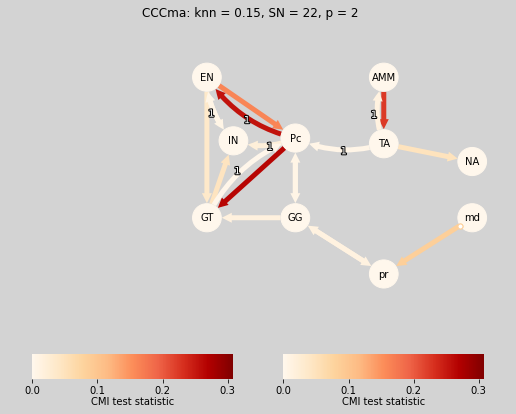

In [289]:
su_basins = [vn for vn in su_basins_full if vn in G['var_names']]
r = len(su_basins)
y_vals.update({b:((r**2-(x_vals.get(b)-(r+1)/2)**2)**.5)-np.min([((3*r**2 + 2*r - 1)**.5)/2,r])+3 for b in su_basins})#
#x_vals.update({'GT':x_vals.get('GT')+.1})
#x_vals.update({'AMM':x_vals.get('AMM')-.3})

#For NCAR:
#y_vals.update({'md':y_vals.get('pr')})
#y_vals.update({'IN':y_vals.get('GT')})
#x_vals.update({'AMM':x_vals.get('IN')})
#y_vals.update({'NA':y_vals.get('Pc')})
#y_vals.update({'TA':y_vals.get('TA')+.2})

#For MRI:
#y_vals.update({'md':y_vals.get('Pc')})
#y_vals.update({'NA':y_vals.get('GT')})
#y_vals.update({'AMM':y_vals.get('EN')})

#For NCAR-TT:
#x_vals.update({'AMM':x_vals.get('AMM')-.3})

#For CCCma:
y_vals.update({'md':2})
y_vals.update({'GG':2})

x_vals.update({'Pc':3})

x = [x_vals.get(vn) for vn in G['var_names']]
y = [y_vals.get(vn) for vn in G['var_names']]
P=tp.plot_graph(
    G['graph'], 
    val_matrix=G['val_matrix'], 
    var_names=G['var_names'], 
    node_pos={'x':x, 'y':list(y)}, 
    arrow_linewidth=5, 
    figsize=(9,6),
    node_colorbar_label="CMI test statistic",
    link_colorbar_label="CMI test statistic",
    vmin_edges=0,
    vmax_edges = mval,
    vmax_nodes = mval,
    edge_ticks = round(10*mval)/30,
    node_ticks = round(10*mval)/30,
    cmap_edges="OrRd",
    node_size=.5,
    tick_label_size=10,
)
P[0].suptitle(t)
P[0].set_facecolor('lightgray')

In [267]:
x_vals = {'NA':4, 'md':5}
x_vals.update(dict.fromkeys(['EN', 'Pc'],1)) #Pacific, Winter and Summer
x_vals.update(dict.fromkeys(['GG', 'SA', 'TT'],2)) #South Atlantic, Spring and Summer
x_vals.update(dict.fromkeys(['AMM', 'TA'],3)) #Tropical Atlantic, Spring and Summer
x_vals.update(dict.fromkeys(['GT', 'pr'],2)) #extras
x_vals.update(dict.fromkeys(['IN'], 0))
EXTRA = ['SB', 'Ph', 'L'] #usually not included
x_vals.update({EXTRA[i]:(i+6) for i in range(len(EXTRA))})
y_vals = {'EN':5.5, 'GT':2, 'TT':1, 'pr':0} #Winter and extras
y_vals.update(dict.fromkeys(['GG', 'AMM'],4.5)) #Spring
su_basins_full = ['Pc', 'SA', 'TA', 'NA', 'md', 'SB', 'IN', 'Ph', 'L']


x_vals.update(dict.fromkeys(['pr'],3))
y_vals.update(dict.fromkeys(['pr'], 1))
x_vals.update(dict.fromkeys(['TT'], 1.5))

In [291]:
 P[0].savefig(fldr+'/'+F[i])

In [290]:
fldr+'/'+F[i]

'new_bests/CCCma_CanESM5_r1i1p2f1_SN22_knn15_p2_tm1'

In [174]:
i=i+1

In [307]:
size = P[0].get_size_inches()

In [308]:
size

array([6., 4.])

In [309]:
P[0].dpi

72.0